In [8]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [9]:
data = load_iris()
#create train and test set for input and output, test_size represent the % of test data
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.25)

#no of rows
m = X_train.shape[0]

#As we are using linearity, For vector multiplication adding a column in X with all the value 1
X = np.hstack((np.ones((m,1)),X_train))

In [10]:
k = np.unique(data.target)
k.sort()

Y = np.zeros((m,len(k)))
    
for cls in k.astype(int):
    Y[np.where(y_train[:] == cls),cls] = 1

In [11]:
def softmax(z):
    return np.exp(z) / np.sum(np.exp(z), axis=1).reshape(z.shape[0], 1)

In [12]:
#define theta with size 3,5 as there are 3 classes and 5 features, lets take the initial value as 0
theta = np.zeros((3,5))

#learning rate
learning_rate = 0.001

#to store cost values
cost_arr = []

#no of iterations we want our model to be trained
no_of_iterations = 50000

#counter
i = 0

for i in range(no_of_iterations):

    #model/hypothesis function
    lineq = np.dot(X, theta.T)
    h = softmax(lineq)

    #Cost function 
    cost = -np.sum(Y * np.log(h)) / m
    cost_arr.append(cost)
    
    #using gradient calculate new theta
    delta = (learning_rate/m) * np.dot((h-Y).T, X)
    theta = theta - delta
    
    i = i + 1

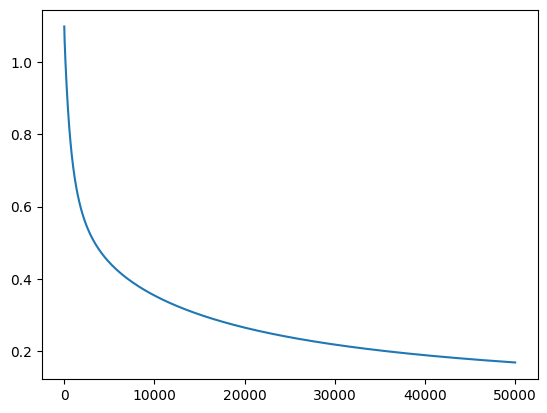

In [13]:
plt.plot(cost_arr)
plt.show()

In [14]:
#no of test samples
m_test = X_test.shape[0]

#As we are using vector implementation adding a column in test_X with all the value 1
X_test = np.hstack((np.ones((m_test,1)),X_test))

probab = softmax(np.dot(X_test,theta.T))
predict = np.argmax(probab, axis=1)

In [15]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, explained_variance_score, accuracy_score

#train the model with training data
regr = linear_model.LogisticRegression()
regr.fit(X,y_train)

#Predict our test data
sklearn_predict = regr.predict(X_test)

print('Sklearn')
#coefficients
print('Coefficients: {}'.format(regr.coef_))
# Accuracy score
print("Accuracy score: %.2f" % accuracy_score(sklearn_predict, y_test))
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(sklearn_predict, y_test))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % explained_variance_score(y_test, sklearn_predict))

print('\n')

print('Our Model')
#coefficients
print('Coefficients: {}'.format(theta))
# Accuracy score
print("Accuracy score: %.2f" % accuracy_score(predict, y_test))
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(predict, y_test))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % explained_variance_score(y_test, predict))

Sklearn
Coefficients: [[-7.85529996e-04 -3.59984405e-01  9.44235044e-01 -2.33965187e+00
  -1.00936200e+00]
 [ 3.74992189e-03  5.37837746e-01 -3.15013120e-01 -2.10636151e-01
  -7.69969898e-01]
 [-2.96439189e-03 -1.77853341e-01 -6.29221924e-01  2.55028803e+00
   1.77933189e+00]]
Accuracy score: 0.97
Mean squared error: 0.03
Variance score: 0.96


Our Model
Coefficients: [[ 0.31467707  0.66840167  1.61803872 -2.22847947 -1.03075195]
 [ 0.37352381  0.61577533 -0.3166096  -0.08076555 -0.73622539]
 [-0.68820089 -1.284177   -1.30142912  2.30924502  1.76697733]]
Accuracy score: 0.97
Mean squared error: 0.03
Variance score: 0.96


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
